# Running TF-IDF - Hiscox TF-IDF From Scratch Take Home Test - Thomas Madeley

# Instructions

Comprehensive instructions on how to create a suitable Conda environment to run this notebook can be found in the readme.md.

1.1. Task
*Your task is to implement the Term Frequency-Inverse Document Frequency (TF-IDF) algorithm from
scratch in Python, without using any pre-built packages or libraries. You may use NLTK or other
libraries for tokenization, stemming, and other preprocessing tasks.*


**I have built an entire repository to calculate TF-IDF for a given text corpus using either the standard notation, **OR** alternatively the sklearn implementation.**

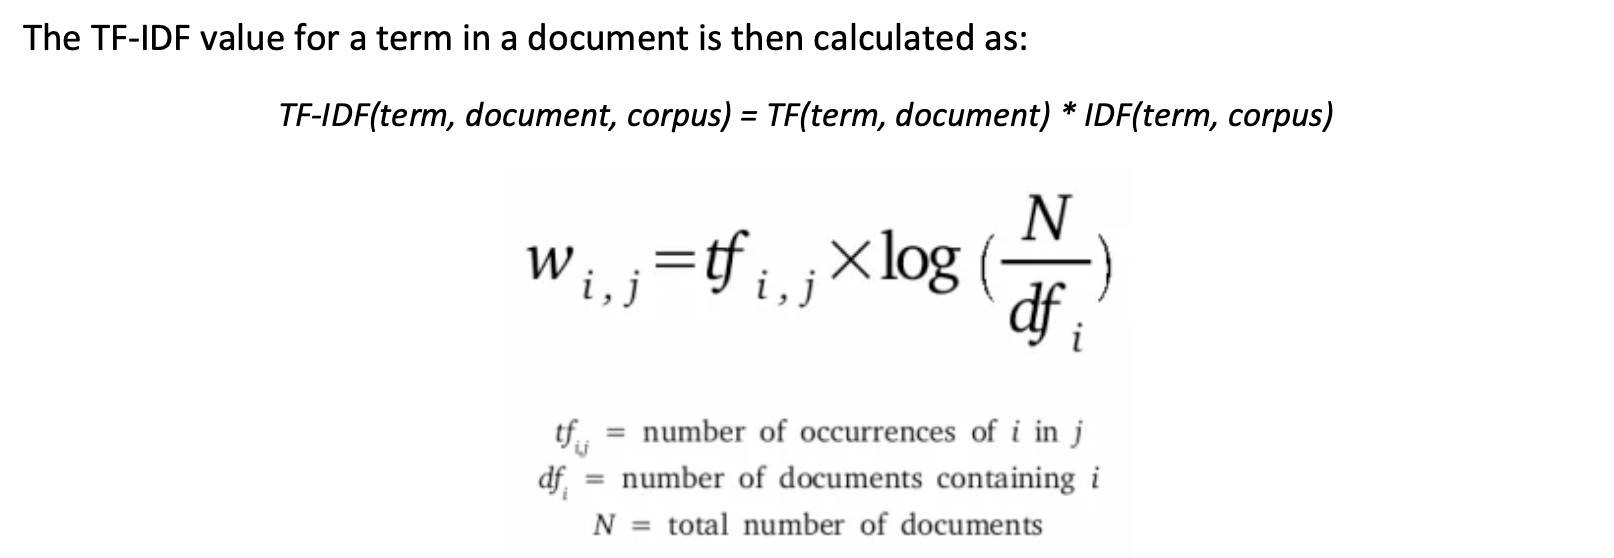

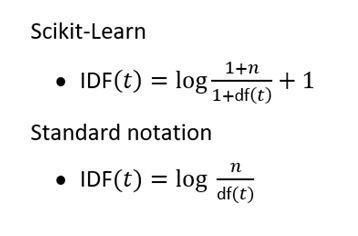


The additional '+1's are parametrised in our implementation and will be discussed below.


The complete task brief can be found in the main repo: `Implement the TF-IDF.pdf` file.

# In This Notebook

- We will run the functions implemented in the main repository for our sample corpus.
- We will compare and constrast the TF-IDF vectors generated and compare the values with the sklearn implementation. 
    - We will examine the output TF-IDF vectors using some formatting functions created earlier
- (Hopefully) demonstrate that given the same parameters, our solution provides the same output as sklearn.


# After This Demo

- We will go through the repository and examine how I laid out the solution logically across several modules, including:
    - Pre-processing steps
    - TF-IDF Calculation
    - Command line interface
    - Unit Testing 




# Import the Required Functions from the code base

- I import the required functions from our repo
- I initialise a helper extension that just reports run times and memory usage. 

In [1]:
from hiscox_tfidf.datasets import load_corpus_from_parquet
from hiscox_tfidf.text_pre_processing import perform_full_preprocessing_and_tokenize
from hiscox_tfidf.tfidf import calculate_tfidf_vectors
from hiscox_tfidf.__main__ import main_calculate_tfidf
from hiscox_tfidf.sklearn_tfidf import sklearn_tfidf

from hiscox_tfidf.utils import format_tfidf_matrix_scores

from datetime import datetime
import pandas as pd
from loguru import logger

In [2]:
%cd ..

/Users/tmadeley/Documents/tfidf_from_scratch


/Users/tmadeley/miniconda3/envs/hiscox_tfidf/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
%load_ext ipython_memory_usage
%imu_start

Enabling IPython Memory Usage, use %imu_start to begin, %imu_stop to end


'IPython Memory Usage started'

In [3] used 0.1 MiB RAM in 0.11s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 213.3 MiB


# Initialise Run Config

- We can customise this however we wish to parametrise the run.


In [4]:
# run config
RUN_CONFIG = {
    "path": "data/documents.parquet",
    "norm": "l1",
    "smooth_idf": True,
    "add_one_sklearn_idf": True,
    "output_path": f"output/vectors_{datetime.now().strftime('%Y%m%d')}.parquet",
}

In [4] used 0.1 MiB RAM in 0.11s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 213.4 MiB


# Lets calculate some TF-IDF Vectors! 

- We can simply run our main function using the run_config and get a result. 
- There are comprehensive logs detailing the steps taken
- The function returns a 'matrix' of TF-IDF vectors and also the vocabulary dictionary
    - The 'matrix' is in quotes because its actually a list of lists as I chose not to use numpy (no packages allowed)
    - The vocabulary is a dictionary of {'term': index} pairs, so we can identify the terms in the vectors later. 

In [5]:
tfidf_vectors, vocabulary = main_calculate_tfidf(RUN_CONFIG)

2024-07-22 15:46:43.227 | INFO     | hiscox_tfidf.__main__:main_calculate_tfidf:88 - Commencing TF-IDF calculation using config: {'path': 'data/documents.parquet', 'norm': 'l1', 'smooth_idf': True, 'add_one_sklearn_idf': True, 'output_path': 'output/vectors_20240722.parquet'}
2024-07-22 15:46:43.229 | INFO     | hiscox_tfidf.utils:check_and_download_nltk_resources:14 - Checking for NLTK resources: ['punkt', 'stopwords', 'wordnet', 'omw-1.4']
2024-07-22 15:46:43.445 | INFO     | hiscox_tfidf.utils:check_and_download_nltk_resources:22 - NLTK resources all present or downloaded successfully.
2024-07-22 15:46:43.445 | INFO     | hiscox_tfidf.datasets:load_corpus_from_parquet:13 - Reading parquet file at: data/documents.parquet
2024-07-22 15:46:43.486 | INFO     | hiscox_tfidf.datasets:load_corpus_from_parquet:19 - Extracting corpus from column: synopsis
2024-07-22 15:46:43.486 | INFO     | hiscox_tfidf.__main__:main_calculate_tfidf:94 - Pre-processing corpus
2024-07-22 15:46:43.961 | INFO 

TF-IDF DataFrame saved to: output/vectors_20240722.parquet
In [5] used 101.0 MiB RAM in 0.93s (system mean cpu 16%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 314.4 MiB


## Outputs

- Our TF-IDF function calculates a sparse TF-IDF vector for each of the input documents
    - It's 'sparse' because it has values (0) for all terms, even if those terms didn't appear in our document.
    - This is important if we wanted to use our vectors for downstream tasks - like input to some other ML model.
- We also output the Vocabulary of our TF-IDF model.
    - This is handy for a number of reasons
    - We can identify the dimensions in our vectors that correspond to each word
    - We can make our TF-IDF Vectors more human-interpretable (we have a function for that!)
    

In [6]:
# Print the TF-IDF Vector for our first document
print(tfidf_vectors[0])
# Print the first 10 pairs from our dictionary
print(list(vocabulary.items())[:10])

[0.0, 0.0, 0.0, 0.0182145432958374, 0.0, 0.02257645692708186, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02257645692708186, 0.0182145432958374, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02257645692708186, 0.02257645692708186, 0.0, 0.0, 0.0, 0.0, 0.02257645692708186, 0.0, 0.0, 0.0, 0.02257645692708186, 0.0, 0.02257645692708186, 0.012719182025689765, 0.0, 0.0, 0.0, 0.0, 0.0182145432958374, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0182145432958374, 0.0, 0.0182145432958374, 0.0, 0.02257645692708186, 0.0, 0.02257645692708186, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02257645692708186, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02257645692708186, 0.0, 0.02257645692708186, 0.0, 0.0, 0.0182145432958374, 0.0, 0.02257645692708186, 0.0, 0.09030582770832744, 0.0546436298875122, 0.0, 0.0, 0.02257645692708186, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015119716322569629, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010757802691325168

In [7]:
# Format the vectors, remove 0 value terms and inspect values...
format_tfidf_matrix_scores(tfidf_vectors, vocabulary)

[{'along': 0.0182145432958374,
  'asked': 0.02257645692708186,
  'became': 0.02257645692708186,
  'brave': 0.0182145432958374,
  'cheered': 0.02257645692708186,
  'chivalry': 0.02257645692708186,
  'courage': 0.02257645692708186,
  'danger': 0.02257645692708186,
  'daughter': 0.02257645692708186,
  'day': 0.012719182025689765,
  'defeated': 0.0182145432958374,
  'eventually': 0.0182145432958374,
  'evil': 0.0182145432958374,
  'facing': 0.02257645692708186,
  'faraway': 0.02257645692708186,
  'gave': 0.02257645692708186,
  'kidnapped': 0.02257645692708186,
  'king': 0.02257645692708186,
  'knight': 0.0182145432958374,
  'known': 0.02257645692708186,
  'lancelot': 0.09030582770832744,
  'land': 0.0546436298875122,
  'legend': 0.02257645692708186,
  'many': 0.015119716322569629,
  'named': 0.010757802691325168,
  'never': 0.02257645692708186,
  'one': 0.012719182025689765,
  'people': 0.02257645692708186,
  'princess': 0.015119716322569629,
  'quest': 0.02257645692708186,
  'rescue': 0.0

In [7] used 0.0 MiB RAM in 0.11s (system mean cpu 9%, single max cpu 37%), peaked 0.0 MiB above final usage, current RAM usage now 314.4 MiB


# Lets calculate some TF-IDF Vectors (using Sci-Kit Learn)! 

- I built a quick function to implement TF-IDF using sklearn so that we can compare and constrast results. 
- This function operates in exactly the same way as our function, it simply uses sklearn to do the TF-IDF calculations.
- All pre-processing steps are exactly the same (for comparison)

In [8]:
sklearn_tfidf_vectors, sklearn_vocab = sklearn_tfidf(RUN_CONFIG)

2024-07-22 15:46:49.877 | INFO     | hiscox_tfidf.datasets:load_corpus_from_parquet:13 - Reading parquet file at: data/documents.parquet
2024-07-22 15:46:49.884 | INFO     | hiscox_tfidf.datasets:load_corpus_from_parquet:19 - Extracting corpus from column: synopsis
2024-07-22 15:46:49.895 | INFO     | hiscox_tfidf.sklearn_tfidf:sklearn_tfidf:39 - Fitting Sci-Kit Learn TF-IDF Vectorizer..
2024-07-22 15:46:49.895 | INFO     | hiscox_tfidf.sklearn_tfidf:sklearn_tfidf:52 - Computing TF-IDF Matrix with Sci-Kit Learn
/Users/tmadeley/miniconda3/envs/hiscox_tfidf/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-07-22 15:46:49.900 | SUCCESS  | hiscox_tfidf.sklearn_tfidf:sklearn_tfidf:59 - TF-IDF Matrix successfully computed with Sci-Kit Learn


In [8] used 0.4 MiB RAM in 0.13s (system mean cpu 12%, single max cpu 38%), peaked 0.0 MiB above final usage, current RAM usage now 314.8 MiB


In [9]:
# Print the TF-IDF Vector for our first document
print(sklearn_tfidf_vectors.toarray()[0])
# Print the first 10 pairs from our dictionary
print(list(sklearn_vocab.items())[:10])

[0.         0.         0.         0.01821454 0.         0.02257646
 0.         0.         0.         0.         0.         0.
 0.         0.02257646 0.01821454 0.         0.         0.
 0.         0.         0.         0.02257646 0.02257646 0.
 0.         0.         0.         0.02257646 0.         0.
 0.         0.02257646 0.         0.02257646 0.01271918 0.
 0.         0.         0.         0.01821454 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01821454 0.         0.01821454 0.
 0.02257646 0.         0.02257646 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.02257646
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.02257646 0.         0.02257646
 0.         0.         0.0182145

In [10]:
# Format the vectors, remove 0 value terms and inspect values...
format_tfidf_matrix_scores(sklearn_tfidf_vectors.toarray(), sklearn_vocab)

[{'upon': 0.022576456927081875,
  'time': 0.04515291385416375,
  'faraway': 0.022576456927081875,
  'land': 0.05464362988751223,
  'brave': 0.01821454329583741,
  'knight': 0.01821454329583741,
  'named': 0.010757802691325173,
  'sir': 0.0903058277083275,
  'lancelot': 0.0903058277083275,
  'known': 0.022576456927081875,
  'strength': 0.022576456927081875,
  'courage': 0.022576456927081875,
  'chivalry': 0.022576456927081875,
  'one': 0.012719182025689774,
  'day': 0.012719182025689774,
  'king': 0.022576456927081875,
  'asked': 0.022576456927081875,
  'rescue': 0.01821454329583741,
  'daughter': 0.022576456927081875,
  'kidnapped': 0.022576456927081875,
  'evil': 0.01821454329583741,
  'sorcerer': 0.03642908659167482,
  'set': 0.022576456927081875,
  'quest': 0.022576456927081875,
  'facing': 0.022576456927081875,
  'many': 0.015119716322569638,
  'danger': 0.022576456927081875,
  'along': 0.01821454329583741,
  'way': 0.015119716322569638,
  'never': 0.022576456927081875,
  'gave': 0

In [10] used 0.0 MiB RAM in 0.12s (system mean cpu 12%, single max cpu 42%), peaked 0.0 MiB above final usage, current RAM usage now 314.8 MiB


# Comparing Outputs Between My Implmentation and Sci-Kit Learn

So a visual inspection doesn't really tell us much as humans, we can't really interpret these vectors. 

If we have implented this correctly, our vectors should be exactly the same given the same run_config. So lets quantify that! 

I created run configurations for all permutations of sklearn compatible parameters.

- L1, L2 and No regularisation
- With and without smooth_idf (these are the +1 values in the numerator/demoninator in the tf-idf formula)
    - Smooth idf weights by adding one to document frequencies, as if an extra document was seen containing every term in the collection exactly once. Prevents zero divisions. 

I found that the results were equal down to 12 decimal places! 🎉


If we set 'add_one_sklearn_idf' to false, as we might expect, we get a different result to sklearn. This is not parametrisable in sklearn and we therefore when following the formula in the brief **exactly** we get a different result to sklearn. 

The `add_idf` parameter is the final '+1' in the sklearn implementation seen here:

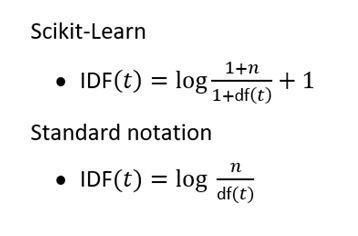

In [13]:
run_configurations = [
    {
        "path": "data/documents.parquet",
        "norm": "l1",
        "smooth_idf": True,
        "add_one_sklearn_idf": True,
        "output_path": None,
    },
    {
        "path": "data/documents.parquet",
        "norm": "l1",
        "smooth_idf": False,
        "add_one_sklearn_idf": True,
        "output_path": None,
    },
    {
        "path": "data/documents.parquet",
        "norm": "l2",
        "smooth_idf": True,
        "add_one_sklearn_idf": True,
        "output_path": None,
    },
    {
        "path": "data/documents.parquet",
        "norm": "l2",
        "smooth_idf": False,
        "add_one_sklearn_idf": True,
        "output_path": None,
    },
    {
        "path": "data/documents.parquet",
        "norm": None,
        "smooth_idf": True,
        "add_one_sklearn_idf": True,
        "output_path": None,
    },
    {
        "path": "data/documents.parquet",
        "norm": None,
        "smooth_idf": False,
        "add_one_sklearn_idf": True,
        "output_path": None,
    },
]

In [13] used 0.0 MiB RAM in 0.10s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 324.2 MiB


In [14]:
# Remove all previously added, to remove loguru logs
logger.remove()
for run_config in run_configurations:

    tfidf_vectors, vocabulary = main_calculate_tfidf(run_config)

    sklearn_tfidf_vectors, sklearn_vocab = sklearn_tfidf(run_config)

    # Round the values in tfidf_matrix_custom to 6 decimal places
    tfidf_matrix_rounded = [
        [round(value, 12) for value in row] for row in tfidf_vectors
    ]

    # Round the values in sklearn_results to 6 decimal places
    sklearn_tfidf_vectors_rounded = [
        [round(value, 12) for value in row] for row in sklearn_tfidf_vectors.toarray()
    ]

    # Check the assertion
    assert (
        tfidf_matrix_rounded == sklearn_tfidf_vectors_rounded
    ), f"Assertion failed: tfidf_matrix_custom != sklearn_results for {run_config}"
print("Assertion passed: tfidf_matrix_custom == sklearn_results")

Assertion passed: tfidf_matrix_custom == sklearn_results
In [14] used 0.0 MiB RAM in 0.20s (system mean cpu 14%, single max cpu 44%), peaked 0.0 MiB above final usage, current RAM usage now 324.2 MiB


/Users/tmadeley/miniconda3/envs/hiscox_tfidf/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/tmadeley/miniconda3/envs/hiscox_tfidf/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/tmadeley/miniconda3/envs/hiscox_tfidf/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/tmadeley/miniconda3/envs/hiscox_tfidf/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/tmadeley/miniconda3/envs/hiscox_tfidf/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521

## Comparing Outputs Between My Implmentation and Sci-Kit Learn - add_idf = False

- Just for illustration, lets run the code with `add_one_sklearn_idf = False`
- As we would expect, our result is now different from the sklearn implementation.


In [15]:
run_configurations = [
    {
        "path": "data/documents.parquet",
        "norm": "l1",
        "smooth_idf": True,
        "add_one_sklearn_idf": False,
        "output_path": None,
    },
]

In [15] used 0.0 MiB RAM in 0.11s (system mean cpu 13%, single max cpu 46%), peaked 0.0 MiB above final usage, current RAM usage now 324.2 MiB


In [16]:
for run_config in run_configurations:

    tfidf_vectors, vocabulary = main_calculate_tfidf(run_config)

    sklearn_tfidf_vectors, sklearn_vocab = sklearn_tfidf(run_config)

    # Round the values in tfidf_matrix_custom to 6 decimal places
    tfidf_matrix_rounded = [
        [round(value, 12) for value in row] for row in tfidf_vectors
    ]

    # Round the values in sklearn_results to 6 decimal places
    sklearn_tfidf_vectors_rounded = [
        [round(value, 12) for value in row] for row in sklearn_tfidf_vectors.toarray()
    ]

    # Check the assertion
    assert (
        tfidf_matrix_rounded == sklearn_tfidf_vectors_rounded
    ), f"Assertion failed: tfidf_matrix_custom != sklearn_results for {run_config}"
print("Assertion passed: tfidf_matrix_custom == sklearn_results")

/Users/tmadeley/miniconda3/envs/hiscox_tfidf/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


AssertionError: Assertion failed: tfidf_matrix_custom != sklearn_results for {'path': 'data/documents.parquet', 'norm': 'l1', 'smooth_idf': True, 'add_one_sklearn_idf': False, 'output_path': None}

In [16] used 0.2 MiB RAM in 0.14s (system mean cpu 11%, single max cpu 40%), peaked 0.0 MiB above final usage, current RAM usage now 324.4 MiB


# Final outputs

In the brief we were asked to calculate TF-IDF scores for all of the terms in the provided documents using the forumala provided. 

Let's do that here using L1 regularisation for **both** the TF and TFIDF scores

- We calculated the vectors and saved them locally.
- Lastly, we created a plot of the vectors using PCA to give a tiny flavour of how they relate to one another. 
    - With such a small sample it's very hard to read anything into this plot, but hopefully gives an idea of how this could be scaled

In [17]:
run_config = {
    "path": "data/documents.parquet",
    "norm": "l1",
    "smooth_idf": False,
    "add_one_sklearn_idf": False,
    "output_path": f"output/vectors_{datetime.now().strftime('%Y%m%d')}.parquet",
}

tfidf_vectors, vocabulary = main_calculate_tfidf(run_config)
format_tfidf_matrix_scores(tfidf_vectors, vocabulary)

TF-IDF DataFrame saved to: output/vectors_20240722.parquet


[{'along': 0.014575106783880467,
  'asked': 0.025600749434377557,
  'became': 0.025600749434377557,
  'brave': 0.014575106783880467,
  'cheered': 0.025600749434377557,
  'chivalry': 0.025600749434377557,
  'courage': 0.025600749434377557,
  'danger': 0.025600749434377557,
  'daughter': 0.025600749434377557,
  'day': 0.0035494641333833764,
  'defeated': 0.014575106783880467,
  'eventually': 0.014575106783880467,
  'evil': 0.014575106783880467,
  'facing': 0.025600749434377557,
  'faraway': 0.025600749434377557,
  'gave': 0.025600749434377557,
  'kidnapped': 0.025600749434377557,
  'king': 0.025600749434377557,
  'knight': 0.014575106783880467,
  'known': 0.025600749434377557,
  'lancelot': 0.10240299773751023,
  'land': 0.0437253203516414,
  'legend': 0.025600749434377557,
  'many': 0.008125519286987853,
  'never': 0.025600749434377557,
  'one': 0.0035494641333833764,
  'people': 0.025600749434377557,
  'princess': 0.008125519286987853,
  'quest': 0.025600749434377557,
  'rescue': 0.014

In [17] used 0.6 MiB RAM in 0.15s (system mean cpu 13%, single max cpu 48%), peaked 0.0 MiB above final usage, current RAM usage now 325.0 MiB


In [19]:
vector_df = pd.read_parquet('output/vectors_20240722.parquet')

In [19] used 2.0 MiB RAM in 0.13s (system mean cpu 15%, single max cpu 49%), peaked 0.0 MiB above final usage, current RAM usage now 331.9 MiB


In [20]:
vector_df

,able,agreed,alive,along,apple,asked,attend,baby,battle,bean,...,wicked,witchcraft,wizard,wizarding,wizardry,woke,woman,wonder,world,young
0,0.000000,0.000000,0.000000,0.014575,0.000000,0.025601,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.014905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029809,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.019802,0.000000,0.019802,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011274,0.000000,0.000000,0.000000,0.000000,0.019802,0.019802,0.000000,0.000000,0.000000
3,0.020153,0.000000,0.000000,0.000000,0.000000,0.000000,0.020153,0.020153,0.020153,0.000000,...,0.000000,0.020153,0.040306,0.020153,0.020153,0.000000,0.000000,0.020153,0.040306,0.020153
4,0.000000,0.000000,0.000000,0.032079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [20] used 0.1 MiB RAM in 0.14s (system mean cpu 14%, single max cpu 47%), peaked 0.0 MiB above final usage, current RAM usage now 332.0 MiB


In [21]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def plot_documents_2d(vectors, labels):
    # Convert the list of vectors to a numpy array
    X = np.array(vectors)

    # Perform PCA to reduce dimensionality to 2
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Create a scatter plot of the documents
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1])

    # Add labels to the points
    for i, label in enumerate(labels):
        plt.annotate(label, (X_pca[i, 0], X_pca[i, 1]))

    # Add labels and title
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("2D Plot of Documents")

    # Display the plot
    plt.show()

In [21] used 18.7 MiB RAM in 3.26s (system mean cpu 22%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 350.6 MiB


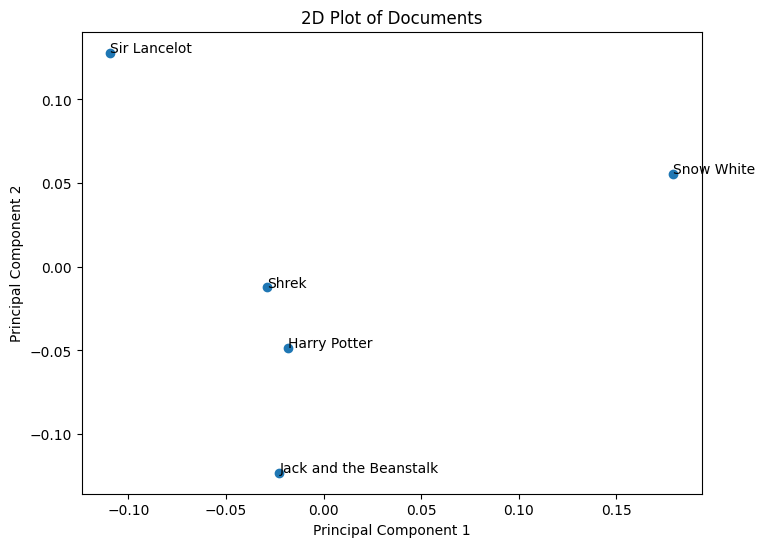

In [22] used 6.1 MiB RAM in 0.20s (system mean cpu 23%, single max cpu 69%), peaked 0.0 MiB above final usage, current RAM usage now 322.0 MiB


In [22]:
titles = [
    "Sir Lancelot",
    "Jack and the Beanstalk",
    "Snow White",
    "Harry Potter",
    "Shrek",
]

plot_documents_2d(tfidf_vectors, titles)